# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as svn
%matplotlib inline
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn import metrics

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier)
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# To perform statistical analysis
import scipy.stats as stats


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)
import warnings
warnings.filterwarnings("ignore")


In [3]:
data=pd.read_csv('clinial_EDA_good.csv',index_col=0)

In [36]:
data

,subject_id,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,Resp_Symp,...,abs_neut_0_cat,abs_lymph_0_cat,abs_mono_0_cat,creat_0_cat,crp_0_cat,ddimer_0_cat,ldh_0_cat,Trop_72h,days_hosp,prognosis
0,1,1,4,0,0,0,0,0,0,1,...,3.0,2.0,2.0,2.0,1.0,1.0,2.0,0,7,Favourable
1,2,2,2,0,0,0,0,0,0,1,...,3.0,3.0,3.0,2.0,3.0,2.0,2.0,0,7,Favourable
2,3,3,4,0,1,0,0,0,0,1,...,3.0,3.0,2.0,2.0,4.0,3.0,4.0,0,7,Favourable
3,4,1,2,0,0,0,0,0,0,1,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0,7,Favourable
4,5,3,3,0,0,0,1,1,0,1,...,3.0,5.0,3.0,2.0,4.0,3.0,3.0,0,28,Favourable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,379,3,3,0,0,0,0,0,0,1,...,3.0,3.0,3.0,2.0,5.0,4.0,5.0,0,28,Favourable
377,380,3,2,0,0,0,0,0,0,1,...,4.0,2.0,2.0,2.0,5.0,3.0,5.0,0,28,Favourable
379,382,1,3,0,0,0,0,0,0,1,...,3.0,2.0,1.0,1.0,4.0,3.0,2.0,0,0,Unfavourable
380,383,5,1,0,0,1,1,1,0,1,...,3.0,2.0,2.0,2.0,3.0,4.0,5.0,0,0,Unfavourable


In [37]:
df=pd.DataFrame(data)
df

,subject_id,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,Resp_Symp,...,abs_neut_0_cat,abs_lymph_0_cat,abs_mono_0_cat,creat_0_cat,crp_0_cat,ddimer_0_cat,ldh_0_cat,Trop_72h,days_hosp,prognosis
0,1,1,4,0,0,0,0,0,0,1,...,3.0,2.0,2.0,2.0,1.0,1.0,2.0,0,7,Favourable
1,2,2,2,0,0,0,0,0,0,1,...,3.0,3.0,3.0,2.0,3.0,2.0,2.0,0,7,Favourable
2,3,3,4,0,1,0,0,0,0,1,...,3.0,3.0,2.0,2.0,4.0,3.0,4.0,0,7,Favourable
3,4,1,2,0,0,0,0,0,0,1,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0,7,Favourable
4,5,3,3,0,0,0,1,1,0,1,...,3.0,5.0,3.0,2.0,4.0,3.0,3.0,0,28,Favourable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,379,3,3,0,0,0,0,0,0,1,...,3.0,3.0,3.0,2.0,5.0,4.0,5.0,0,28,Favourable
377,380,3,2,0,0,0,0,0,0,1,...,4.0,2.0,2.0,2.0,5.0,3.0,5.0,0,28,Favourable
379,382,1,3,0,0,0,0,0,0,1,...,3.0,2.0,1.0,1.0,4.0,3.0,2.0,0,0,Unfavourable
380,383,5,1,0,0,1,1,1,0,1,...,3.0,2.0,2.0,2.0,3.0,4.0,5.0,0,0,Unfavourable


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 382
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       279 non-null    int64  
 1   Age_cat          279 non-null    int64  
 2   BMI_cat          279 non-null    int64  
 3   HEART            279 non-null    int64  
 4   LUNG             279 non-null    int64  
 5   KIDNEY           279 non-null    int64  
 6   DIABETES         279 non-null    int64  
 7   HTN              279 non-null    int64  
 8   IMMUNO           279 non-null    int64  
 9   Resp_Symp        279 non-null    int64  
 10  Fever_Sympt      279 non-null    int64  
 11  GI_Symp          279 non-null    int64  
 12  Acuity_0         279 non-null    int64  
 13  Acuity_3         279 non-null    int64  
 14  Acuity_7         279 non-null    int64  
 15  Acuity_28        279 non-null    int64  
 16  abs_neut_0_cat   279 non-null    float64
 17  abs_lymph_0_cat 

In [39]:
df.drop(columns=['subject_id','Acuity_0','Acuity_3','Acuity_7','Acuity_28'],inplace=True)

In [40]:
df

,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,Resp_Symp,Fever_Sympt,...,abs_neut_0_cat,abs_lymph_0_cat,abs_mono_0_cat,creat_0_cat,crp_0_cat,ddimer_0_cat,ldh_0_cat,Trop_72h,days_hosp,prognosis
0,1,4,0,0,0,0,0,0,1,1,...,3.0,2.0,2.0,2.0,1.0,1.0,2.0,0,7,Favourable
1,2,2,0,0,0,0,0,0,1,1,...,3.0,3.0,3.0,2.0,3.0,2.0,2.0,0,7,Favourable
2,3,4,0,1,0,0,0,0,1,0,...,3.0,3.0,2.0,2.0,4.0,3.0,4.0,0,7,Favourable
3,1,2,0,0,0,0,0,0,1,1,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0,7,Favourable
4,3,3,0,0,0,1,1,0,1,1,...,3.0,5.0,3.0,2.0,4.0,3.0,3.0,0,28,Favourable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3,3,0,0,0,0,0,0,1,1,...,3.0,3.0,3.0,2.0,5.0,4.0,5.0,0,28,Favourable
377,3,2,0,0,0,0,0,0,1,1,...,4.0,2.0,2.0,2.0,5.0,3.0,5.0,0,28,Favourable
379,1,3,0,0,0,0,0,0,1,1,...,3.0,2.0,1.0,1.0,4.0,3.0,2.0,0,0,Unfavourable
380,5,1,0,0,1,1,1,0,1,1,...,3.0,2.0,2.0,2.0,3.0,4.0,5.0,0,0,Unfavourable


# Preparing data for modeling

### String variable transformation into integer variable type--> category 1 - 0 (1=> Favourable, 0=>Unfavourable)

In [41]:
df2 = df.copy()
df2

,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,Resp_Symp,Fever_Sympt,...,abs_neut_0_cat,abs_lymph_0_cat,abs_mono_0_cat,creat_0_cat,crp_0_cat,ddimer_0_cat,ldh_0_cat,Trop_72h,days_hosp,prognosis
0,1,4,0,0,0,0,0,0,1,1,...,3.0,2.0,2.0,2.0,1.0,1.0,2.0,0,7,Favourable
1,2,2,0,0,0,0,0,0,1,1,...,3.0,3.0,3.0,2.0,3.0,2.0,2.0,0,7,Favourable
2,3,4,0,1,0,0,0,0,1,0,...,3.0,3.0,2.0,2.0,4.0,3.0,4.0,0,7,Favourable
3,1,2,0,0,0,0,0,0,1,1,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0,7,Favourable
4,3,3,0,0,0,1,1,0,1,1,...,3.0,5.0,3.0,2.0,4.0,3.0,3.0,0,28,Favourable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3,3,0,0,0,0,0,0,1,1,...,3.0,3.0,3.0,2.0,5.0,4.0,5.0,0,28,Favourable
377,3,2,0,0,0,0,0,0,1,1,...,4.0,2.0,2.0,2.0,5.0,3.0,5.0,0,28,Favourable
379,1,3,0,0,0,0,0,0,1,1,...,3.0,2.0,1.0,1.0,4.0,3.0,2.0,0,0,Unfavourable
380,5,1,0,0,1,1,1,0,1,1,...,3.0,2.0,2.0,2.0,3.0,4.0,5.0,0,0,Unfavourable


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 382
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age_cat          279 non-null    int64  
 1   BMI_cat          279 non-null    int64  
 2   HEART            279 non-null    int64  
 3   LUNG             279 non-null    int64  
 4   KIDNEY           279 non-null    int64  
 5   DIABETES         279 non-null    int64  
 6   HTN              279 non-null    int64  
 7   IMMUNO           279 non-null    int64  
 8   Resp_Symp        279 non-null    int64  
 9   Fever_Sympt      279 non-null    int64  
 10  GI_Symp          279 non-null    int64  
 11  abs_neut_0_cat   279 non-null    float64
 12  abs_lymph_0_cat  279 non-null    float64
 13  abs_mono_0_cat   279 non-null    float64
 14  creat_0_cat      279 non-null    float64
 15  crp_0_cat        279 non-null    float64
 16  ddimer_0_cat     279 non-null    float64
 17  ldh_0_cat       

In [43]:
prog_cate= []
for i in df2['prognosis']:
    if i =='Favourable':
        prog_cate.append('1')
    else:
        prog_cate.append('0')
df2['prognosis']=prog_cate
df2

,Age_cat,BMI_cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,Resp_Symp,Fever_Sympt,...,abs_neut_0_cat,abs_lymph_0_cat,abs_mono_0_cat,creat_0_cat,crp_0_cat,ddimer_0_cat,ldh_0_cat,Trop_72h,days_hosp,prognosis
0,1,4,0,0,0,0,0,0,1,1,...,3.0,2.0,2.0,2.0,1.0,1.0,2.0,0,7,1
1,2,2,0,0,0,0,0,0,1,1,...,3.0,3.0,3.0,2.0,3.0,2.0,2.0,0,7,1
2,3,4,0,1,0,0,0,0,1,0,...,3.0,3.0,2.0,2.0,4.0,3.0,4.0,0,7,1
3,1,2,0,0,0,0,0,0,1,1,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0,7,1
4,3,3,0,0,0,1,1,0,1,1,...,3.0,5.0,3.0,2.0,4.0,3.0,3.0,0,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3,3,0,0,0,0,0,0,1,1,...,3.0,3.0,3.0,2.0,5.0,4.0,5.0,0,28,1
377,3,2,0,0,0,0,0,0,1,1,...,4.0,2.0,2.0,2.0,5.0,3.0,5.0,0,28,1
379,1,3,0,0,0,0,0,0,1,1,...,3.0,2.0,1.0,1.0,4.0,3.0,2.0,0,0,0
380,5,1,0,0,1,1,1,0,1,1,...,3.0,2.0,2.0,2.0,3.0,4.0,5.0,0,0,0


In [44]:
# Before creating any models, it is important to transform variables in categorical type. 
for feature in df2.columns:
    if df2[feature].dtype == 'object':
        df2[feature]=pd.Categorical(df2[feature])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 382
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age_cat          279 non-null    int64   
 1   BMI_cat          279 non-null    int64   
 2   HEART            279 non-null    int64   
 3   LUNG             279 non-null    int64   
 4   KIDNEY           279 non-null    int64   
 5   DIABETES         279 non-null    int64   
 6   HTN              279 non-null    int64   
 7   IMMUNO           279 non-null    int64   
 8   Resp_Symp        279 non-null    int64   
 9   Fever_Sympt      279 non-null    int64   
 10  GI_Symp          279 non-null    int64   
 11  abs_neut_0_cat   279 non-null    float64 
 12  abs_lymph_0_cat  279 non-null    float64 
 13  abs_mono_0_cat   279 non-null    float64 
 14  creat_0_cat      279 non-null    float64 
 15  crp_0_cat        279 non-null    float64 
 16  ddimer_0_cat     279 non-null    float64 
 1

# Preprocessing Data

In [45]:
X = df2.drop(['prognosis'],axis=1)
Y = df2['prognosis']

In [46]:
X.astype(int)
X=pd.get_dummies(X, drop_first=True)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [48]:
df_train_test = pd.DataFrame({'Shape of training': X_train.shape,
                              'Shape of test':X_test.shape,
                              'Percentage of classes in training set':y_train.value_counts(normalize=True)*100,
                              'Percenatage of classes in testing set':y_test.value_counts(normalize=True)*100                             
                             })
df_train_test

,Shape of training,Shape of test,Percentage of classes in training set,Percenatage of classes in testing set
1,195,84,72.307692,72.619048
0,20,20,27.692308,27.380952


# Principal Component Analysis
Para poder reducir el volumen de las variables y poder entender sobre cuantas variables se centran el peso de los datos, se realizara el analisis de PCA

In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [51]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.18183625, 0.11901366, 0.07863298, 0.06876744, 0.06093929,
       0.05514406, 0.05026435, 0.04809512, 0.04702561, 0.0442655 ,
       0.0383204 , 0.03592742, 0.03460386, 0.02848776, 0.02389954,
       0.02224709, 0.01994231, 0.01738811, 0.01427856, 0.01092069])

**Hay dos variables que podrian explicar cerca del 30% de la varianza de los datos, sin embargo el resto de las variables poseen en su conjunto un peso elevado**

# Modelos de Clasificación. Supervised

## Objetive

Como objetivo se establece generar un modelo de clasificacion de pacientes favorable/desfavorable en torno a sus variables clinicas mostradas en su dia de ingreso.

Los algoritmos seleccionados son:
- DecisionTree
- RamdonForest
- Bagging estimator
- Boosting estimators (AdaBoosting, Gradient Boosting and XGB)

**El criterio de evaluación que se sigue para los diferentes modelos es el siguiente:**

    - Si el modelo predice una buena prognosis o pronóstico positivo (favorable) cuando el paciente en realidad tiene una prognosis negativa (desfavorable) (Falso Negativo), podría ocurrir que un paciente derive en una situación crítica debido a la asignación a posteriori de un tratamiento erróneo.
    
    - Si el modelo predice una prognosis desfavorable cuando el paciente en realidad tiene una buena prognosis, puede ocurrir que el paciente obtenga un tratamiento más agresivo y por lo tanto poder derivar en otras patologías diferentes a las producidas por el COVID, o bien podría darse de alta con mayor antelación (Falso Positivos).
    
Aunque en este caso los falsos positivos son importantes, una predicción cuyo peso se centre en reducir los falsos positivos, sacrificando la detección de falsos negativos podría derivar en un mayor número de pacientes con peor prognosis y tratamientos erróneos, llevando al individuo a una prognosis desfavorable. Por tanto, se considera como factor más importante la optimización de la sensibilidad o reducción de falsos positivos. 


# Decision Tree

In [52]:
model_DT= DecisionTreeClassifier(criterion='gini' ,random_state=1)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [53]:
DT_train_performance = model_performance_classification_sklearn(model_DT, X_train, y_train)
DT_test_performance = model_performance_classification_sklearn(model_DT, X_test, y_test)

In [54]:
print(f'Performance of train set\n:{DT_train_performance}')
print(f'Performance of test set\n:{DT_test_performance}')

Performance of train set
:   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Performance of test set
:   Accuracy    Recall  Precision        F1
0  0.714286  0.754098   0.836364  0.793103


### Decision Tree Hypertuning

In [55]:
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}
recall_dtree = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=recall_dtree, cv=5)

grid_obj = grid_obj.fit(X_train, y_train) 
dtree_estimator = grid_obj.best_estimator_
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

In [56]:
DT_train_performance_hyper = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
DT_test_performance_hyper = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print(f'Performance of train set\n:{DT_train_performance_hyper}')
print(f'Performance of test set\n:{DT_test_performance_hyper}')

Performance of train set
:   Accuracy    Recall  Precision        F1
0  0.651282  0.574468   0.910112  0.704348
Performance of test set
:   Accuracy   Recall  Precision        F1
0  0.547619  0.52459   0.780488  0.627451


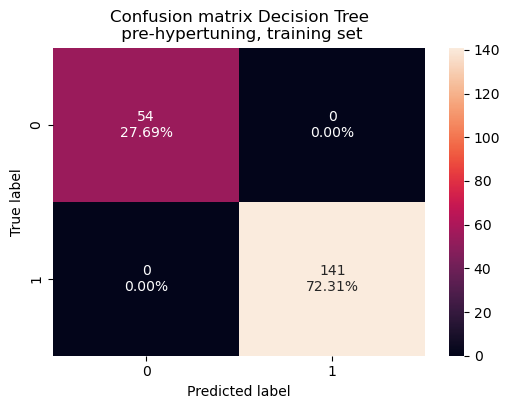

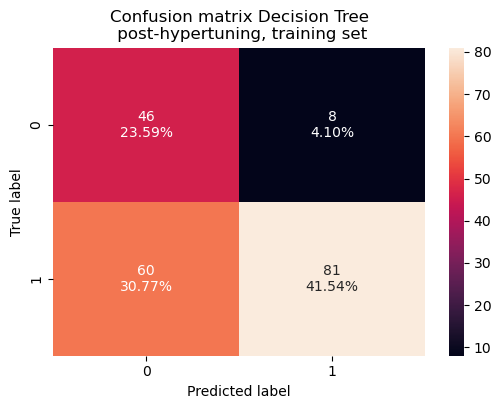

In [57]:
confusion_matrix_sklearn(model_DT, X_train, 
                          y_train, 
                          title='Confusion matrix Decision Tree\n pre-hypertuning, training set')
                          
confusion_matrix_sklearn(dtree_estimator,
                          X_train, 
                          y_train, 
                          title='Confusion matrix Decision Tree\n post-hypertuning, training set')

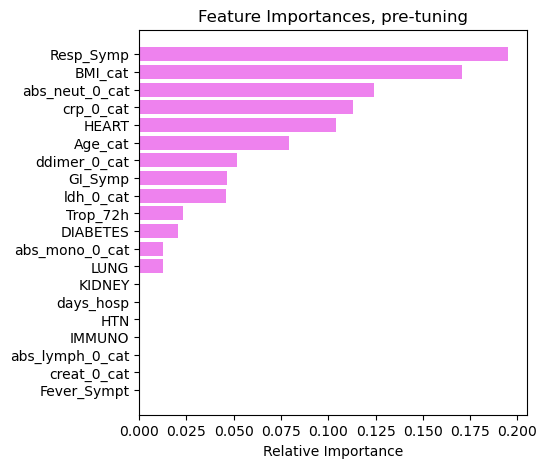

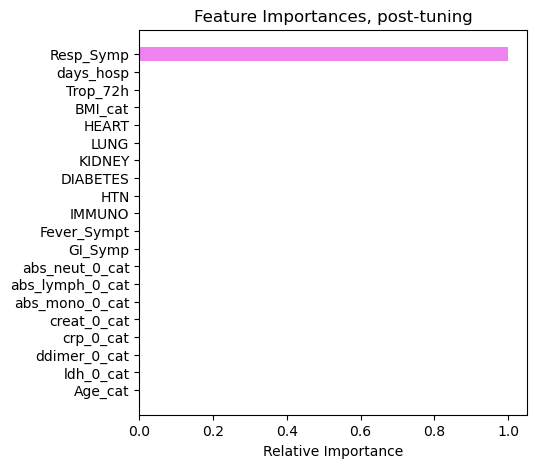

In [58]:
impor_feat(model_DT, title='pre-tuning')
impor_feat(dtree_estimator, title='post-tuning')

# Random Forest

In [59]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [60]:
rf_train_performance = model_performance_classification_sklearn(rf, X_train, y_train)
rf_test_performance = model_performance_classification_sklearn(rf, X_test, y_test)
print(f'Performance of train set\n:{rf_train_performance}')
print(f'Performance of test set\n:{rf_test_performance}')

Performance of train set
:   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Performance of test set
:   Accuracy    Recall  Precision        F1
0  0.845238  0.967213   0.842857  0.900763


In [61]:

rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
rf_recall = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=recall_score,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=5,
                       n_estimators=15, oob_score=True, random_state=1)

In [62]:
rf_train_performance_tuned = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_test_performance_tuned = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print(f'Performance of train set\n:{rf_train_performance_tuned}')
print(f'Performance of test set\n:{rf_test_performance_tuned}')

Performance of train set
:   Accuracy  Recall  Precision        F1
0  0.969231     1.0   0.959184  0.979167
Performance of test set
:   Accuracy   Recall  Precision        F1
0  0.821429  0.95082   0.828571  0.885496


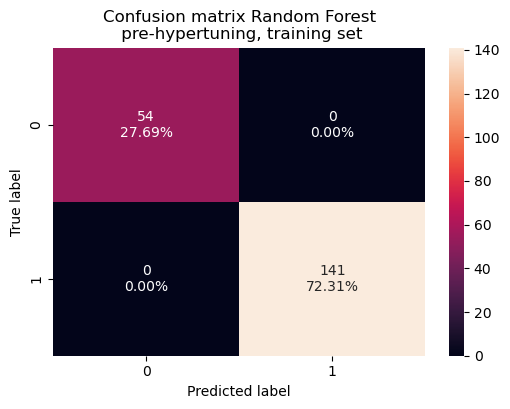

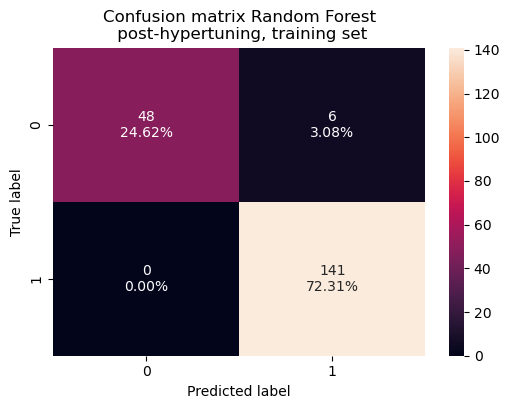

In [63]:
confusion_matrix_sklearn(rf, X_train, y_train, title='Confusion matrix Random Forest\n pre-hypertuning, training set')
confusion_matrix_sklearn(rf_tuned, X_train, y_train, title='Confusion matrix Random Forest\n post-hypertuning, training set')

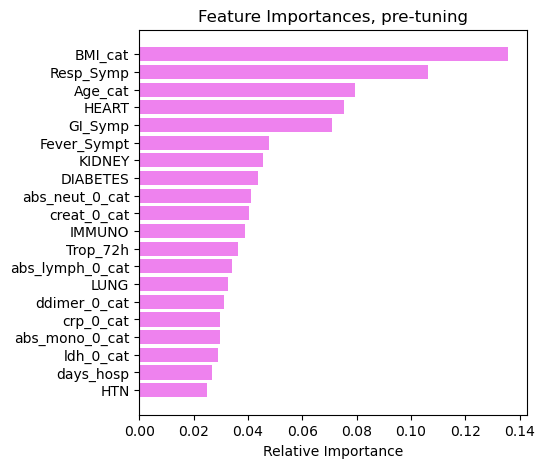

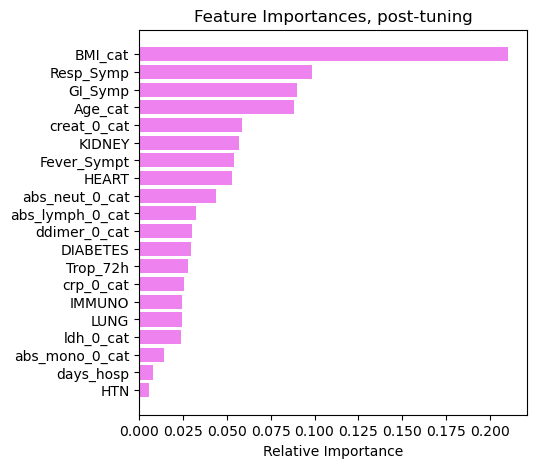

In [64]:
impor_feat(rf, title='pre-tuning')
impor_feat(rf_tuned, title='post-tuning')

## Bagging Classifier

In [65]:
bagging=BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [66]:
bagg_train_performance = model_performance_classification_sklearn(bagging, X_train, y_train)
bagg_test_performance = model_performance_classification_sklearn(bagging, X_test, y_test)
print(f'Performance of train set\n:{bagg_train_performance}')
print(f'Performance of test set\n:{bagg_test_performance}')

Performance of train set
:   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Performance of test set
:   Accuracy    Recall  Precision        F1
0  0.761905  0.819672   0.847458  0.833333


In [67]:
bagging_tuned = BaggingClassifier(oob_score=True, bootstrap=True, random_state=1)
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
bagging_recall = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=bagging_recall,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
bagging_tuned = grid_obj.best_estimator_
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, oob_score=True,
                  random_state=1)

In [68]:
bagg_train_performance_tuned = model_performance_classification_sklearn(bagging_tuned, X_train, y_train)
bagg_test_performance_tuned = model_performance_classification_sklearn(bagging_tuned, X_test, y_test)
print(f'Performance of train set\n:{bagg_train_performance_tuned}')
print(f'Performance of test set\n:{bagg_test_performance_tuned}')

Performance of train set
:   Accuracy    Recall  Precision        F1
0  0.974359  0.985816   0.978873  0.982332
Performance of test set
:   Accuracy    Recall  Precision        F1
0  0.821429  0.934426   0.838235  0.883721


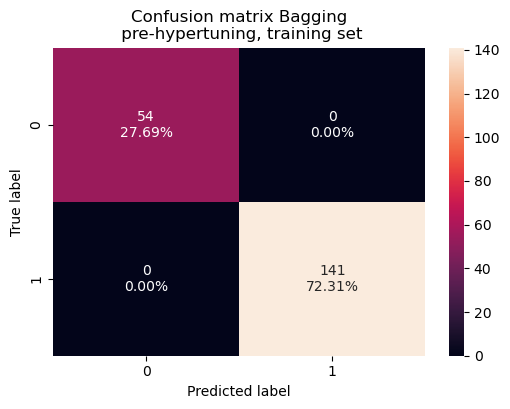

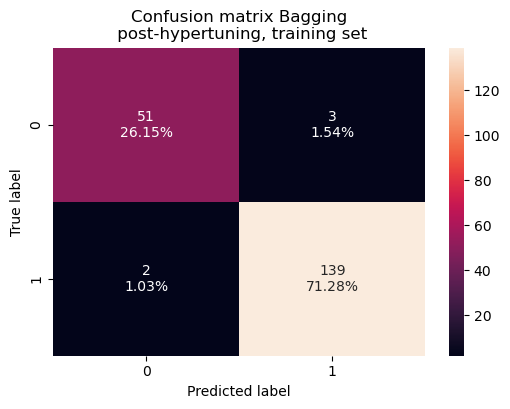

In [69]:
confusion_matrix_sklearn(bagging, X_train, y_train, title='Confusion matrix Bagging\n pre-hypertuning, training set')
confusion_matrix_sklearn(bagging_tuned, X_train, y_train, title='Confusion matrix Bagging\n post-hypertuning, training set')

# AdaBoosting

In [70]:
model_AdaBoost = AdaBoostClassifier(random_state=1)
model_AdaBoost.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [71]:
Ada_train_performance= model_performance_classification_sklearn(model_AdaBoost, X_train, y_train)
Ada_test_performance = model_performance_classification_sklearn(model_AdaBoost, X_test, y_test)
print(f'Performance of train set\n:{Ada_train_performance}')
print(f'Performance of test set\n:{Ada_test_performance}')

Performance of train set
:   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Performance of test set
:   Accuracy    Recall  Precision     F1
0  0.797619  0.885246    0.84375  0.864


## Hypertuning - AdaBoosting

In [72]:
adaboos_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1, class_weight='balanced', random_state=1),
                      DecisionTreeClassifier(max_depth=2, class_weight='balanced', random_state=1),
                      DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}
recall_score_tuned = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(adaboos_tuned, parameters, scoring=recall_score_tuned,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
adaboos_tuned = grid_obj.best_estimator_
adaboos_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [73]:
Ada_train_performance_tuned= model_performance_classification_sklearn(adaboos_tuned, X_train, y_train)
Ada_test_performance_tuned = model_performance_classification_sklearn(adaboos_tuned, X_test, y_test)
print(f'Performance of train set\n:{Ada_train_performance_tuned}')
print(f'Performance of test set\n:{Ada_test_performance_tuned}')

Performance of train set
:   Accuracy    Recall  Precision        F1
0  0.841026  0.843972   0.929688  0.884758
Performance of test set
:   Accuracy    Recall  Precision        F1
0      0.75  0.819672   0.833333  0.826446


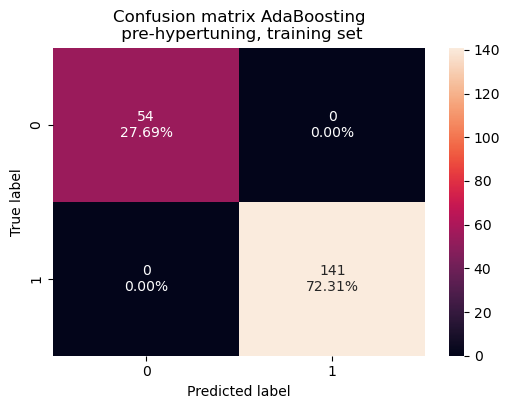

In [74]:
confusion_matrix_sklearn(model_AdaBoost, X_train, y_train, title='Confusion matrix AdaBoosting\n pre-hypertuning, training set')

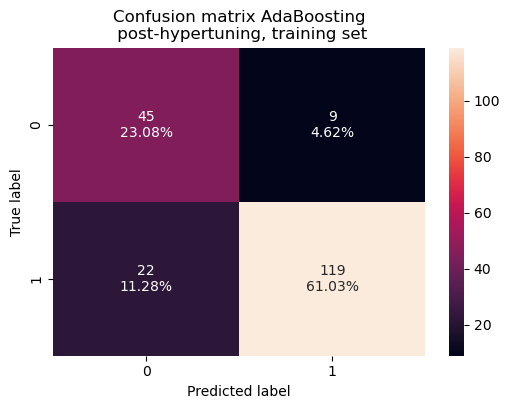

In [75]:
imagen10= confusion_matrix_sklearn(adaboos_tuned, X_train, y_train, title='Confusion matrix AdaBoosting\n post-hypertuning, training set')

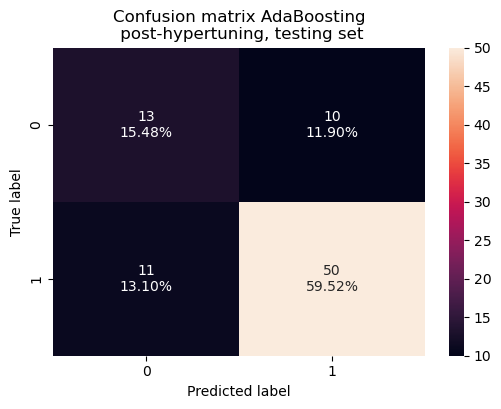

In [76]:
imagen11=confusion_matrix_sklearn(adaboos_tuned, X_test, y_test, title='Confusion matrix AdaBoosting\n post-hypertuning, testing set')

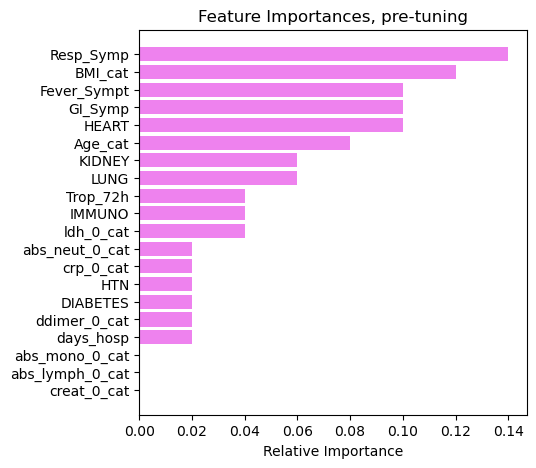

In [77]:
impor_feat(model_AdaBoost, title='pre-tuning')


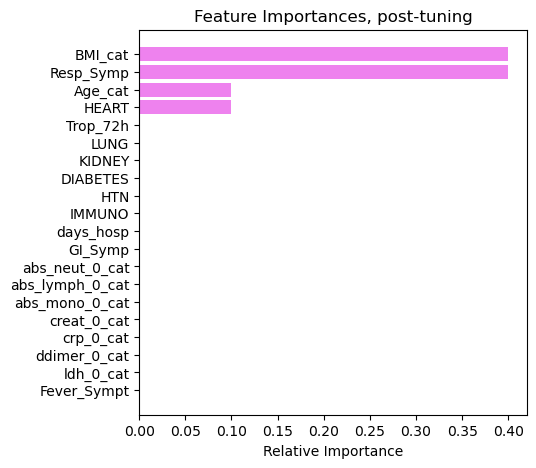

In [78]:
imagen12=impor_feat(adaboos_tuned, title='post-tuning')

# Gradient Boosting Classifier

In [79]:
model_gbc = GradientBoostingClassifier(random_state = 1)
model_gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [80]:
Gbc_train_performance = model_performance_classification_sklearn( model_gbc, X_train, y_train)
Gbc_test_performance = model_performance_classification_sklearn(model_gbc, X_test, y_test)
print(f'Performance of train set\n:{Gbc_train_performance}')
print(f'Performance of test set\n:{Gbc_test_performance}') 

Performance of train set
:   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Performance of test set
:   Accuracy    Recall  Precision        F1
0  0.809524  0.868852   0.868852  0.868852


In [81]:
gdb_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}
gbc_recall = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(gdb_tuned, parameters, scoring=gbc_recall, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
gdb_tuned = grid_obj.best_estimator_
gdb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=0.9)

In [82]:
Gbc_train_performance_tuning = model_performance_classification_sklearn(gdb_tuned, X_train, y_train)
Gbc_test_performance_tuning = model_performance_classification_sklearn(gdb_tuned, X_test, y_test)
print(f'Performance of train set\n:{Gbc_train_performance_tuning}')
print(f'Performance of test set\n:{Gbc_test_performance_tuning}') 

Performance of train set
:   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Performance of test set
:   Accuracy    Recall  Precision    F1
0  0.821429  0.901639   0.859375  0.88


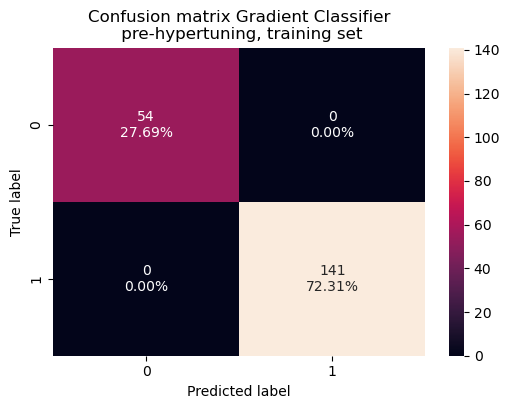

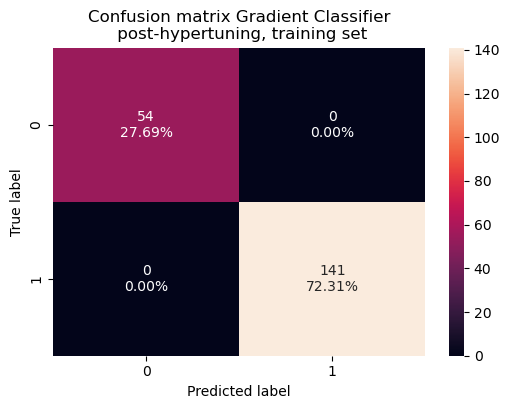

In [83]:
confusion_matrix_sklearn(model_gbc, X_train, y_train, title='Confusion matrix Gradient Classifier\n pre-hypertuning, training set')
confusion_matrix_sklearn(gdb_tuned, X_train, y_train, title='Confusion matrix Gradient Classifier\n post-hypertuning, training set')

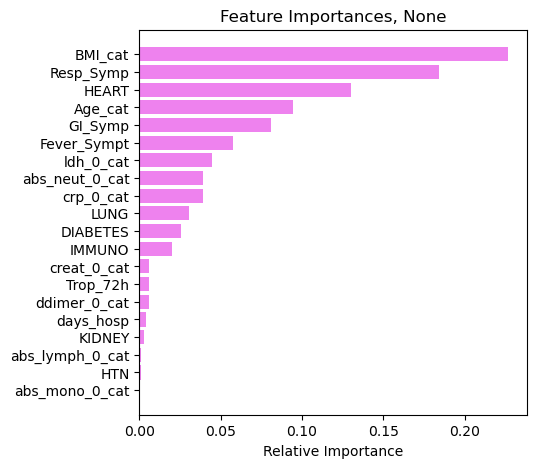

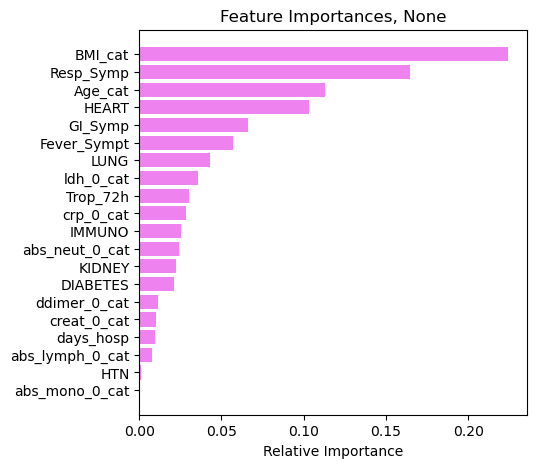

In [84]:
impor_feat(model_gbc)
impor_feat(gdb_tuned)

# XGBoost Classifier

In [85]:
model_xg= XGBClassifier(random_state=1)
model_xg.fit(X_train, y_train)

[23:31:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
xgb_train_performance = model_performance_classification_sklearn(model_xg, X_train, y_train)
xgb_test_performance = model_performance_classification_sklearn(model_xg, X_test, y_test)
print(f'Performance of train set\n:{xgb_train_performance}')
print(f'Performance of test set\n:{xgb_test_performance}') 


Performance of train set
:   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Performance of test set
:   Accuracy    Recall  Precision        F1
0  0.797619  0.868852   0.854839  0.861789


## Hyptertuning

In [87]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
xgb_recall = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=xgb_recall, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='logloss', gamma=3,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [88]:
xgb_train_performance_tuning = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_test_performance_tuning = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
print(f'Performance of train set\n:{xgb_train_performance_tuning}')
print(f'Performance of test set\n:{xgb_test_performance_tuning}') 

Performance of train set
:   Accuracy  Recall  Precision        F1
0  0.969231     1.0   0.959184  0.979167
Performance of test set
:   Accuracy    Recall  Precision        F1
0  0.785714  0.918033   0.811594  0.861538


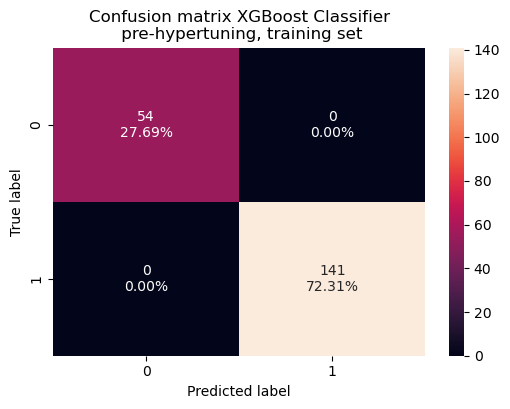

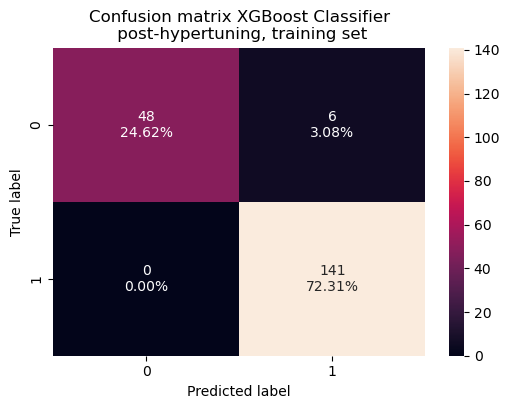

In [89]:
confusion_matrix_sklearn(model_xg, X_train, y_train, title='Confusion matrix XGBoost Classifier\n pre-hypertuning, training set')
confusion_matrix_sklearn(xgb_tuned, X_train, y_train, title='Confusion matrix XGBoost Classifier\n post-hypertuning, training set')

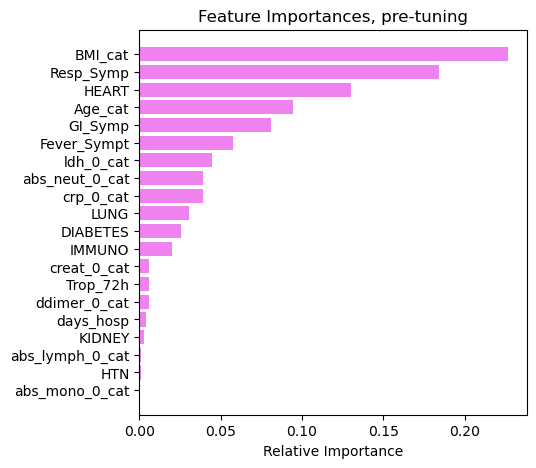

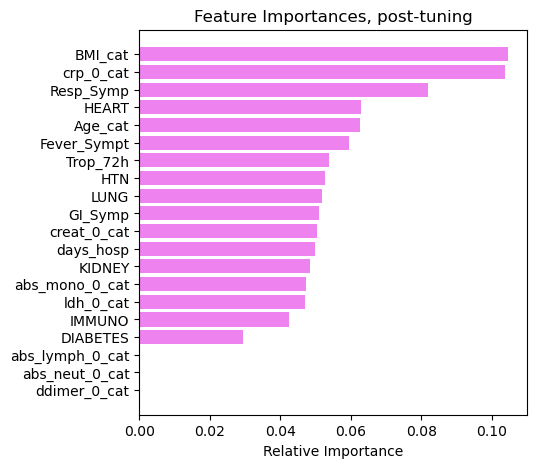

In [90]:
impor_feat(model_gbc, 'pre-tuning')
impor_feat(xgb_tuned, 'post-tuning')

# Stacking Classifier

In [91]:
estimators = [
    ("AdaBoost", adaboos_tuned),
    ("Gradient Boosting", gdb_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                         max_depth=1,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=10,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                             

Training performance:
    Accuracy  Recall  Precision        F1
0  0.979487     1.0   0.972414  0.986014
Testing performance:
    Accuracy    Recall  Precision        F1
0      0.75  0.868852    0.80303  0.834646


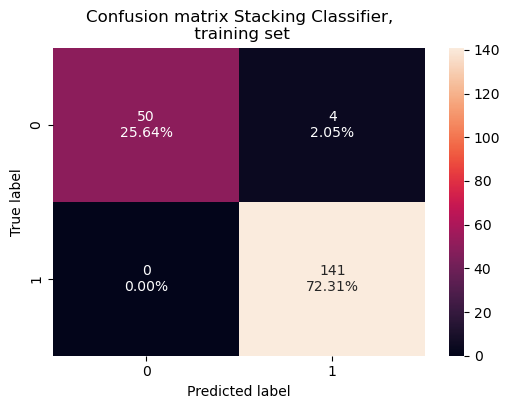

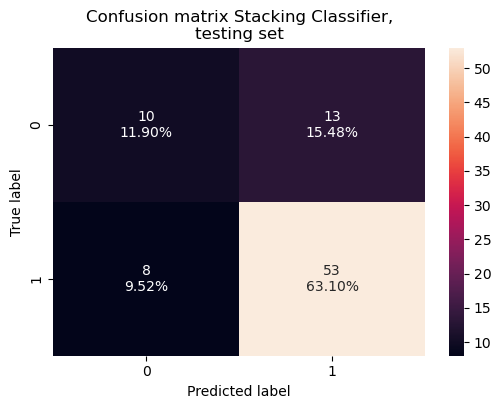

In [92]:
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,
                                                                              X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_train,y_train,title = 'Confusion matrix Stacking Classifier,\n training set')
confusion_matrix_sklearn(stacking_classifier,X_test,y_test, title = 'Confusion matrix Stacking Classifier,\ntesting set')

In [93]:
models_train_comp_df = pd.concat(
    [DT_train_performance.T, DT_train_performance_hyper.T,
     rf_train_performance.T,rf_train_performance_tuned.T,
     Ada_train_performance.T,Ada_train_performance_tuned.T,
     Gbc_train_performance.T,Gbc_train_performance_tuning.T,
     xgb_train_performance.T, xgb_train_performance_tuning.T,
     stacking_classifier_model_train_perf.T,
     bagg_train_performance.T,bagg_train_performance_tuned.T
     ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier",
    "Bagging Classifier",
    'Bagging Classifier Tuned'
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Adaboost Classifier,Adaboost Tuned,Gradient Boost,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Classifier,Bagging Classifier,Bagging Classifier Tuned
Accuracy,1.0,0.651282,1.0,0.969231,1.0,0.841026,1.0,1.0,1.0,0.969231,0.979487,1.0,0.974359
Recall,1.0,0.574468,1.0,1.000000,1.0,0.843972,1.0,1.0,1.0,1.000000,1.000000,1.0,0.985816
Precision,1.0,0.910112,1.0,0.959184,1.0,0.929688,1.0,1.0,1.0,0.959184,0.972414,1.0,0.978873
F1,1.0,0.704348,1.0,0.979167,1.0,0.884758,1.0,1.0,1.0,0.979167,0.986014,1.0,0.982332


In [94]:
models_train_comp_df.to_excel('table 1.xlsx')

In [95]:
models_test_comp_df = pd.concat(
    [DT_test_performance.T, DT_test_performance_hyper.T,
     rf_test_performance.T,rf_test_performance_tuned.T,
     Ada_test_performance.T,Ada_test_performance_tuned.T,
     Gbc_test_performance.T,Gbc_test_performance_tuning.T,
     xgb_test_performance.T, xgb_test_performance_tuning.T,
     stacking_classifier_model_test_perf.T,
     bagg_test_performance.T,bagg_test_performance_tuned.T
     ],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
    "Gradient Boost",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier",
    "Bagging Classifier",
    'Bagging Classifier Tuned'

]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Classifier,Bagging Classifier,Bagging Classifier Tuned
Accuracy,0.714286,0.547619,0.845238,0.821429,0.797619,0.750000,0.809524,0.821429,0.797619,0.785714,0.750000,0.761905,0.821429
Recall,0.754098,0.524590,0.967213,0.950820,0.885246,0.819672,0.868852,0.901639,0.868852,0.918033,0.868852,0.819672,0.934426
Precision,0.836364,0.780488,0.842857,0.828571,0.843750,0.833333,0.868852,0.859375,0.854839,0.811594,0.803030,0.847458,0.838235
F1,0.793103,0.627451,0.900763,0.885496,0.864000,0.826446,0.868852,0.880000,0.861789,0.861538,0.834646,0.833333,0.883721


# Conclusiones

**Atendiendo a los parametros obtenidos en los diferentes algoritmos de clasificacion supervisada podemos concluir lo siguiente:**

**- En general los modelos poseen overfitting devido principalmente a que el peso de la variable-target creada: 'prognosis', posee macho peso una de sus observaciones, se recomienda realizar un oversampling para generar mayor observaciones para 'unfavourable'**

**- La metrica mas importante para este caso de clasificacion es la sensibilidad o recall, ya que la optimizacion de la prediccion del numero de falsos positivos (falsos pacientes con buena prognosis) podria llevar a pacientes con una prediccion peor derivar a una situacion critica debido a un tratamiento equivocado**.

**- Teniendo en cuenta la metrica de recall, los modelos que menor overfitting y mejor rendimiento ofrecen son:**
   - Training set: AdaBoosting y Bagging Classifier.
   - Testing set: Random Forest (pre- after- tuning) y Bagging Classifier

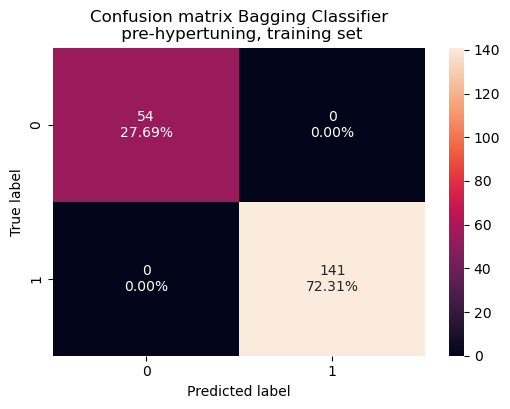

In [96]:
imagen5=confusion_matrix_sklearn(bagging,X_train,
                         y_train,title='Confusion matrix Bagging Classifier\n pre-hypertuning, training set')

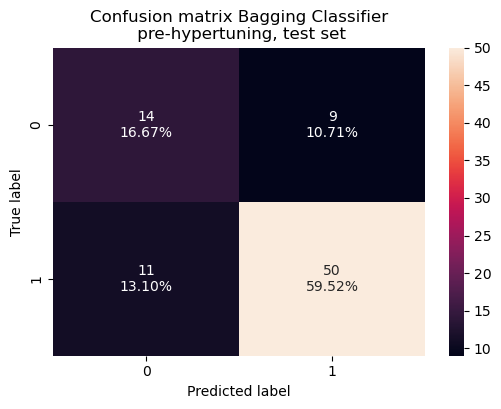

In [97]:
imagen6=confusion_matrix_sklearn(bagging,X_test,
                         y_test,title='Confusion matrix Bagging Classifier\n pre-hypertuning, test set')

# Annex

In [98]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, 
                          pos_label = '1')  # to compute Recall
    precision = precision_score(target, pred, pos_label='1')  # to compute Precision
    f1 = f1_score(target, pred, pos_label='1')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [99]:
def confusion_matrix_sklearn(model, predictors, target, title=None,ax=None):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    Y_pred = model.predict(predictors)
    cm = confusion_matrix(target, Y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", ax=ax)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(title)

In [100]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,Y_train)
    test_acc = model.score(X_test,Y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(Y_train,pred_train)
    test_recall = metrics.recall_score(Y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(Y_train,pred_train)
    test_precision = metrics.precision_score(Y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,Y_train))
        print("Accuracy on test set : ",model.score(X_test,Y_test))
        print("Recall on training set : ",metrics.recall_score(Y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(Y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(Y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(Y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [101]:
def impor_feat (model, title=None):
    feature_names = X.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(5,5))
    plt.title(f'Feature Importances, {title}')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()


In [102]:
def tree_plot(model):
    feature_names = X_train.columns
    plt.figure(figsize=(20, 20))

    out = tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=True,
        class_names=True,
    )
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()